<a href="https://colab.research.google.com/github/anacastrocc/3.coffeesales/blob/main/Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science**  - Análise da venda de café de uma máquina de autoatendimento

21 de setembro de 2024

## 1.Definição do problema e informações gerais
 **1.1 Visão geral**
  
 A base de dados analisada, que foi extraída  Kaggle, contém registros de vendas de café de uma máquina de autoatendimento.


  **1.2 Análises a serem desenvolvidas**

  Após a análise inicial das variáveis, foram identificadas algumas estratégias para análise da base, fornecendo insights sobre o comportamento do consumidor:



*   Análise Temporal;
*   Análise de Tipo de Café;
*   Análise de recorrência.




  **1.3 Questionamentos a serem respondidos**


  1. Qual o dia da semana em que as vendas alcançam seu pico?

  2. As vendas, no geral, estão aumentando ou diminuindo?

  3. Qual o tipo de café mais vendido?

  4. Qual a forma de pagamento mais utilizada?

  5. Qual a frequência de compras por cliente?

  6. Qual o valor médio por tipo de café?



  **1.4 Dataset**

  https://www.kaggle.com/datasets/ihelon/coffee-sales

## 2.Carregamento dos dados

In [ ]:
#importando biblioteca pandas

import pandas as pd

In [ ]:
#carregando a base de dados

dados = pd.read_csv('/content/drive/MyDrive/Estudos/Alura/1- Data Science: explorando e analisando dados/Análise Coffee Sales/index.csv')
dados

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1390,2024-08-27,2024-08-27 10:04:04.563,card,ANON-0000-0000-0375,32.82,Latte
1391,2024-08-28,2024-08-28 12:08:18.772,card,ANON-0000-0000-0551,27.92,Americano with Milk
1392,2024-08-28,2024-08-28 12:10:04.139,card,ANON-0000-0000-0551,32.82,Cappuccino
1393,2024-08-28,2024-08-28 12:35:06.944,card,ANON-0000-0000-0375,23.02,Americano


## 3. Análise exploratória dos dados


In [ ]:
# informação sobre a dimensão dos dados que serão explorados
dados.shape

(1395, 6)


Podemos observar que existem **6 colunas e 1395 linhas** no **DataFrame** importado. Irei denominar cada **coluna** como **variável**. Sendo assim, temos as seguintes variáveis: Data da Compra, Data e hora da compra, Forma de Pagamento, Número do cartão anônimo, valor do café e o tipo de café comprado.

O entendimento dessas variáveis é bastante importante para nossa análise de modo geral, visto que delas podemos extrair diversas **informações** que nos ajudam a responder os **questionamentos** propostos no início.

Além disso, entender a dimensão do nosso DataFrame nos auxilia no **planejamento da análise**, permitindo utilizar estratégias diferentes para examinar suas variáveis. Por fim, pode nos orientar sobre a **qualidade dos dados** e processo de **limpeza**, bem como a **identificação de erros**, entre outros pontos.

In [ ]:
# modificando o nome das nossas variáveis
dados.columns = ["Data da compra", "Data e hora da compra", "Forma de Pagamento", "Número do Cartão", "Valor da compra", "Tipo de Café"]
dados.head(5)

,Data da compra,Data e hora da compra,Forma de Pagamento,Número do Cartão,Valor da compra,Tipo de Café
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte




Agora que temos uma visualização mais enxuta do nossos dados, entendendo as variáveis existentes e a dimensão da análise que podemos extrair delas, vamos começar algumas etapas do processo de análise.

## 3.1 Respondendo aos questionamentos

***1. Qual o dia da semana em que as vendas alcançam seu pico?*** (Análise Temporal)

Ao responder essa pergunta, podemos entender alguns padrões interessantes entre os clientes.

Ter noção do dia em que nossos clientes estão acostumados a consumir nosso produto pode nos auxiliar no planejamento de estoque, reposição do produto e em estratégias de Marketing.


In [ ]:
# através da variável "Data da Compra", extraímos o dia da semana em que a compra foi realizada
dados['Data da compra'] = pd.to_datetime(dados['Data da compra'])
dados['Dia da Semana'] = dados['Data da compra'].dt.day_name()
dados.head()

,Data da compra,Data e hora da compra,Forma de Pagamento,Número do Cartão,Valor da compra,Tipo de Café,Dia da Semana
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday


In [ ]:
# verificando quais dias da semana tiveram compras na máquina de autoatendimento
dados["Dia da Semana"].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

Quando usamos `.unique()`, percebemos que existem compras todos os dias da semana, mas quais são os dias com maior e menor volume?

In [ ]:
dias_da_semana = dados["Dia da Semana"].value_counts()
dias_da_semana

,count
Dia da Semana,
Tuesday,220
Thursday,207
Wednesday,199
Saturday,195
Friday,194
Monday,192
Sunday,188


Aqui já notamos que o dia onde ocorre o maior volume de vendas é na Terça - Feira.

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


Para que possamos observar melhor os dados da tabela que criamos, vamos plotar um gráfico de barras.

<ipython-input-9-6c7d003b5edf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Dia da Semana', data = dados, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


<function matplotlib.pyplot.show(close=None, block=None)>

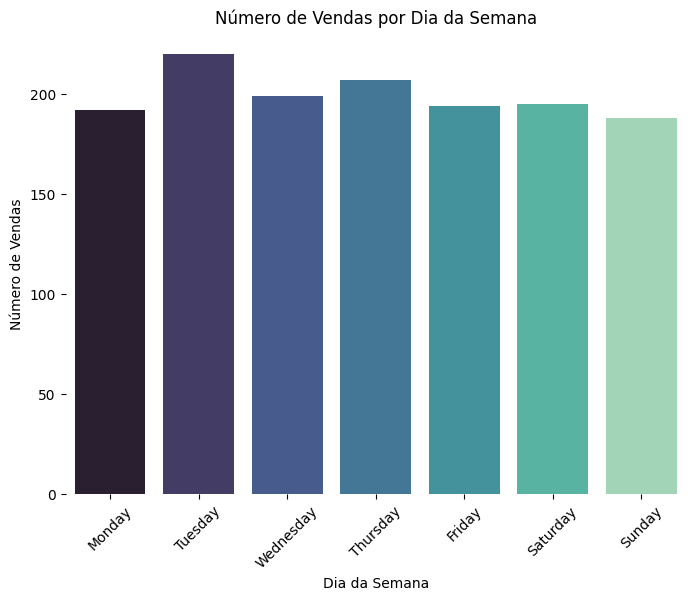

In [ ]:
#importando bibliotecas matplotlib e seaborn e plotando o gráfico
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x= 'Dia da Semana', data = dados, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
              ,palette=("mako"))
plt.title('Número de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)
plt.show



A partir do gráfico, conseguimos visualizar melhor o dia da semana em que ocorreram mais vendas e também um número aproximado de vendas.

*2. As vendas, no geral, estão aumentando ou diminuindo?* (Análise Temporal)



In [ ]:
dados.head(5)

,Data da compra,Data e hora da compra,Forma de Pagamento,Número do Cartão,Valor da compra,Tipo de Café,Dia da Semana
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday


In [ ]:
# através da variável "Data da Compra", extraímos o mês da copmpra com o intuito de verificar uma possível análise temporal
vendas_por_mês = dados['Data da compra'] = pd.to_datetime(dados['Data da compra'])
dados['Mês da Compra'] = dados['Data da compra'].dt.month_name()
dados.head()

,Data da compra,Data e hora da compra,Forma de Pagamento,Número do Cartão,Valor da compra,Tipo de Café,Dia da Semana,Mês da Compra
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday,March
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday,March
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday,March


In [ ]:
# através da variável "Data da Compra", extraimos o ano da copmpra com o intuito de verificar uma possível análise temporal
dados['Data da compra'] = pd.to_datetime(dados['Data da compra'])
dados['Ano da Compra'] = dados['Data da compra'].dt.year
dados.head()

,Data da compra,Data e hora da compra,Forma de Pagamento,Número do Cartão,Valor da compra,Tipo de Café,Dia da Semana,Mês da Compra,Ano da Compra
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday,March,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday,March,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday,March,2024


In [ ]:
# verificando ano das compras realizadas na máquina de autoatendimento
ano_da_compra = dados["Ano da Compra"].value_counts()
ano_da_compra

,count
Ano da Compra,
2024,1395


Após a verificação, pode-se notar que nossa base de dados demonstra apenas vendas do ano de 2024, não fazendo sentido analisar se as vendas estão crescendo ou diminindo através do ano da compra.

In [ ]:
# verificando meses das compras realizadas na máquina de autoatendimento
vendas_por_mes = dados["Mês da Compra"].value_counts()
vendas_por_mes

,count
Mês da Compra,
May,267
August,262
July,237
June,227
March,206
April,196


Agora, por mês, torna-se possível realizar essa análise. Com o código anterior, já podemos ter uma noção do comportamento das vendas no ano de 2024.

Text(0, 0.5, 'Quantidade Vendida')

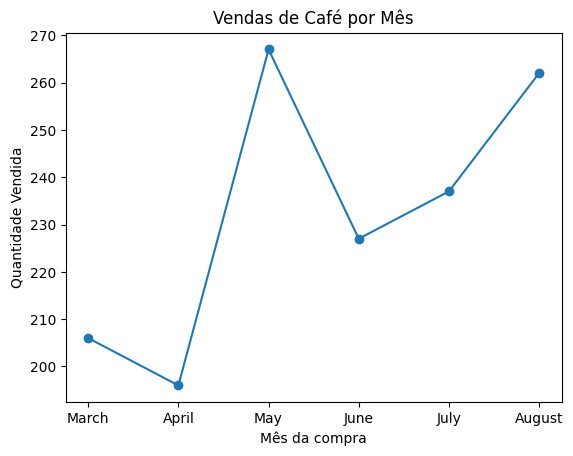

In [ ]:
# criando gráfico
ordem_meses = ['March','April', 'May','June','July','August']
dados['Mês da Compra'] = pd.Categorical(dados['Mês da Compra'], categories=ordem_meses, ordered=True)
vendas_por_mes = dados['Mês da Compra'].value_counts().sort_index()
vendas_por_mes.plot(kind="line",marker='o' )
plt.title('Vendas de Café por Mês')
plt.xlabel('Mês da compra')
plt.ylabel('Quantidade Vendida')



Observando o gráfico criado, podemos notar que as vendas apresentaram oscilações significativas ao longo dos meses. O gráfico plotado mostra picos e quedas que podem indicar mudanças sazonais.

As vendas iniciam com um número pequeno em março, aumentam consideravelmente em maio, atingindo a maior quantidade de vendas no ano, até o momento. Após o pico de maio, em Junho, as vendas caem, sugerindo que o crescimento exponencial de maio possa ser um evento isolado. Por fim, depois de junho, as vendas voltam a crescer aos poucos.

Pontos importantes a serem recomendados:

*   Investigar o motivo do aumento considerável em maio;
*   Verificar os meses com baixa demanda e implementar estratégias para aumento das vendas.



*3. Qual o tipo de café mais vendido?* (Análise Tipo de Café)

Essa pergunta tem como intuito a avaliação dos tipos de cafés mais vendidos. A resposta pode auxiliar no ajuste do estoque, bem como na promoção dos cafés mais populares.


In [ ]:
# visualizando a tabela em relação ao tipo de café mais consumido
tipos_de_cafe = dados["Tipo de Café"].value_counts().to_frame().reset_index()
tipos_de_cafe.columns=["Tipo de Café", "Total"]
tipos_de_cafe

,Tipo de Café,Total
0,Americano with Milk,336
1,Latte,300
2,Cappuccino,230
3,Americano,205
4,Cortado,136
5,Hot Chocolate,80
6,Espresso,62
7,Cocoa,46


Podemos notar, pela tabela, que o tipo de café mais vendido é o Americano com Leite.

<ipython-input-17-95e54a7fd79b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= tipos_de_cafe, x="Tipo de Café", y="Total",palette=("mako"),width= True)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cocoa')])

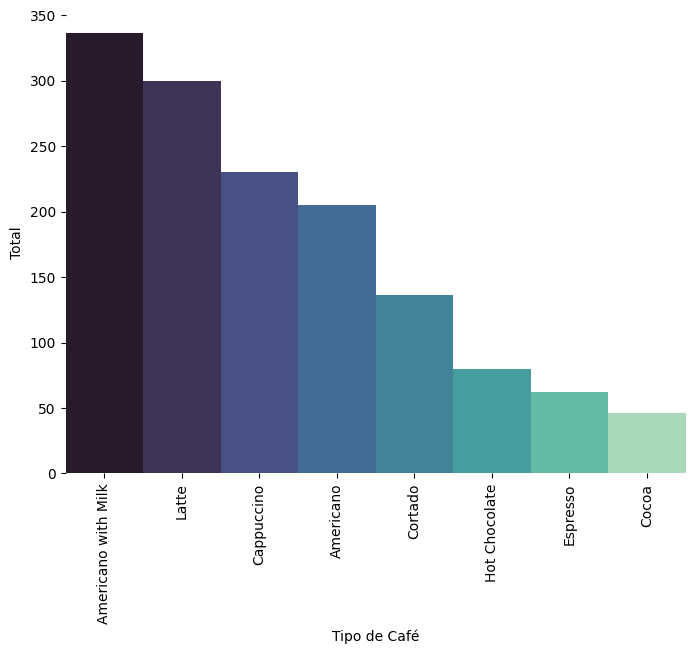

In [ ]:
# criando um gráfico para tornar a visualização mais agradável
plt.figure(figsize=(8,6))
sns.barplot(data= tipos_de_cafe, x="Tipo de Café", y="Total",palette=("mako"),width= True)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)


*4. Qual a forma de pagamento mais utilizada?* (Análise de Forma de Pagamento)



In [ ]:
dados.head(5)

,Data da compra,Data e hora da compra,Forma de Pagamento,Número do Cartão,Valor da compra,Tipo de Café,Dia da Semana,Mês da Compra,Ano da Compra
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday,March,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday,March,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday,March,2024


In [ ]:
# verificando as formas de pagamento existentes
forma_de_pagamento = dados["Forma de Pagamento"].unique()
forma_de_pagamento

array(['card', 'cash'], dtype=object)

In [ ]:
# analisando a quantidade de compras feitas em cada forma de pagamento
forma_de_pagamento = dados["Forma de Pagamento"].value_counts().to_frame().reset_index()
forma_de_pagamento.columns=["Forma de Pagamento", "Total"]
forma_de_pagamento

,Forma de Pagamento,Total
0,card,1306
1,cash,89


<Axes: xlabel='Forma de Pagamento', ylabel='Total'>

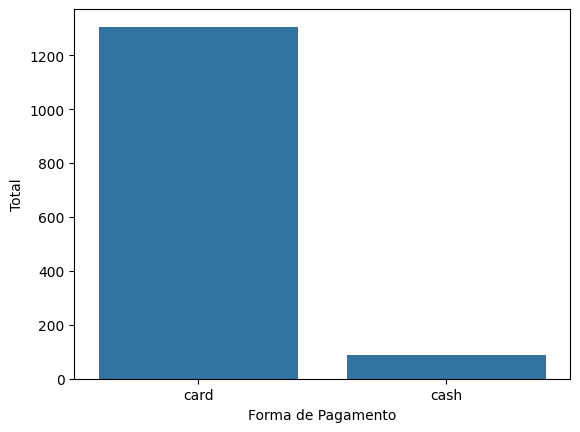

In [ ]:
# criando gráfico
sns.barplot(data= forma_de_pagamento, x="Forma de Pagamento", y="Total")

*5. Qual a frequência de compras por cliente?* (Análise de Recorrência)

Esse questionamento auxilia na identificação de clientes fiéis, a fim de realizar algum tipo de estratégia ou gratificação.

In [ ]:
# verificando frequência de compra por número do cartão
frequencia_de_compras = dados['Número do Cartão'].value_counts()
frequencia_de_compras

,count
Número do Cartão,
ANON-0000-0000-0012,96
ANON-0000-0000-0009,67
ANON-0000-0000-0141,42
ANON-0000-0000-0097,38
ANON-0000-0000-0040,30
...,...
ANON-0000-0000-0107,1
ANON-0000-0000-0108,1
ANON-0000-0000-0302,1


In [ ]:
# frequência de compras com cartões
frequencia_de_compras = dados['Número do Cartão'].value_counts()
cartoes_mais_de_uma_vez = frequencia_de_compras[frequencia_de_compras > 1]
quantidade_cartoes_mais_de_uma_vez = len(cartoes_mais_de_uma_vez)
cartoes_uma_vez = frequencia_de_compras[frequencia_de_compras == 1]
quantidade_cartoes_uma_vez = len(cartoes_uma_vez)
print("Quantidade de cartões que apareceram mais de uma vez:", quantidade_cartoes_mais_de_uma_vez)
print("Quantidade de cartões que apareceram apenas uma vez:", quantidade_cartoes_uma_vez)


Quantidade de cartões que apareceram mais de uma vez: 210
Quantidade de cartões que apareceram apenas uma vez: 342


In [ ]:
dados.head(5)

,Data da compra,Data e hora da compra,Forma de Pagamento,Número do Cartão,Valor da compra,Tipo de Café,Dia da Semana,Mês da Compra,Ano da Compra
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday,March,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday,March,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday,March,2024


*6. Qual o valor médio por tipo de café?* (Análise do tipo de Café)

Ao obter a resposta para esse questionamento, iremos observar quais tipos de café têm um preço médio mais alto e quais têm um preço mais baixo.

Abaixo, percebemos que o café expresso e o americano têm menor valor médio, visto que são cafés mais simples, com utilização de poucos ingredientes.

Em contrapartida, o hot chocolate e o latte possuem valor médio alto em comparação aos outros, devido à elaboração e uso de ingredientes mais sofisticados.

Também é necessário observar o valor que cada tipo de café agrega para o negócio.

A aplicação de algumas estratégias é necessária para que os cafés com maior valor médio continuem gerando um faturamento satisfatório, e para que os que possuem valor médio inferior possam, de alguma forma, agregar mais valor ao negócio.




In [ ]:
valor_medio = dados.groupby('Tipo de Café')
valor_medio = grouped['Valor da compra'].mean()
valor_medio

,Valor da compra
Tipo de Café,
Americano,26.698829
Americano with Milk,31.251488
Cappuccino,36.734870
Cocoa,36.020870
Cortado,26.447206
Espresso,21.551290
Hot Chocolate,37.192500
Latte,36.266267
